In [1]:
# Part 1: London’s underground resilience
# I. Topological network 
# I.1. Centrality measures: 

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [2]:
#OK, let us start with the graphml file for London's underground

G = nx.read_graphml('london.graph')

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [5]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [6]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
    

In [7]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [8]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

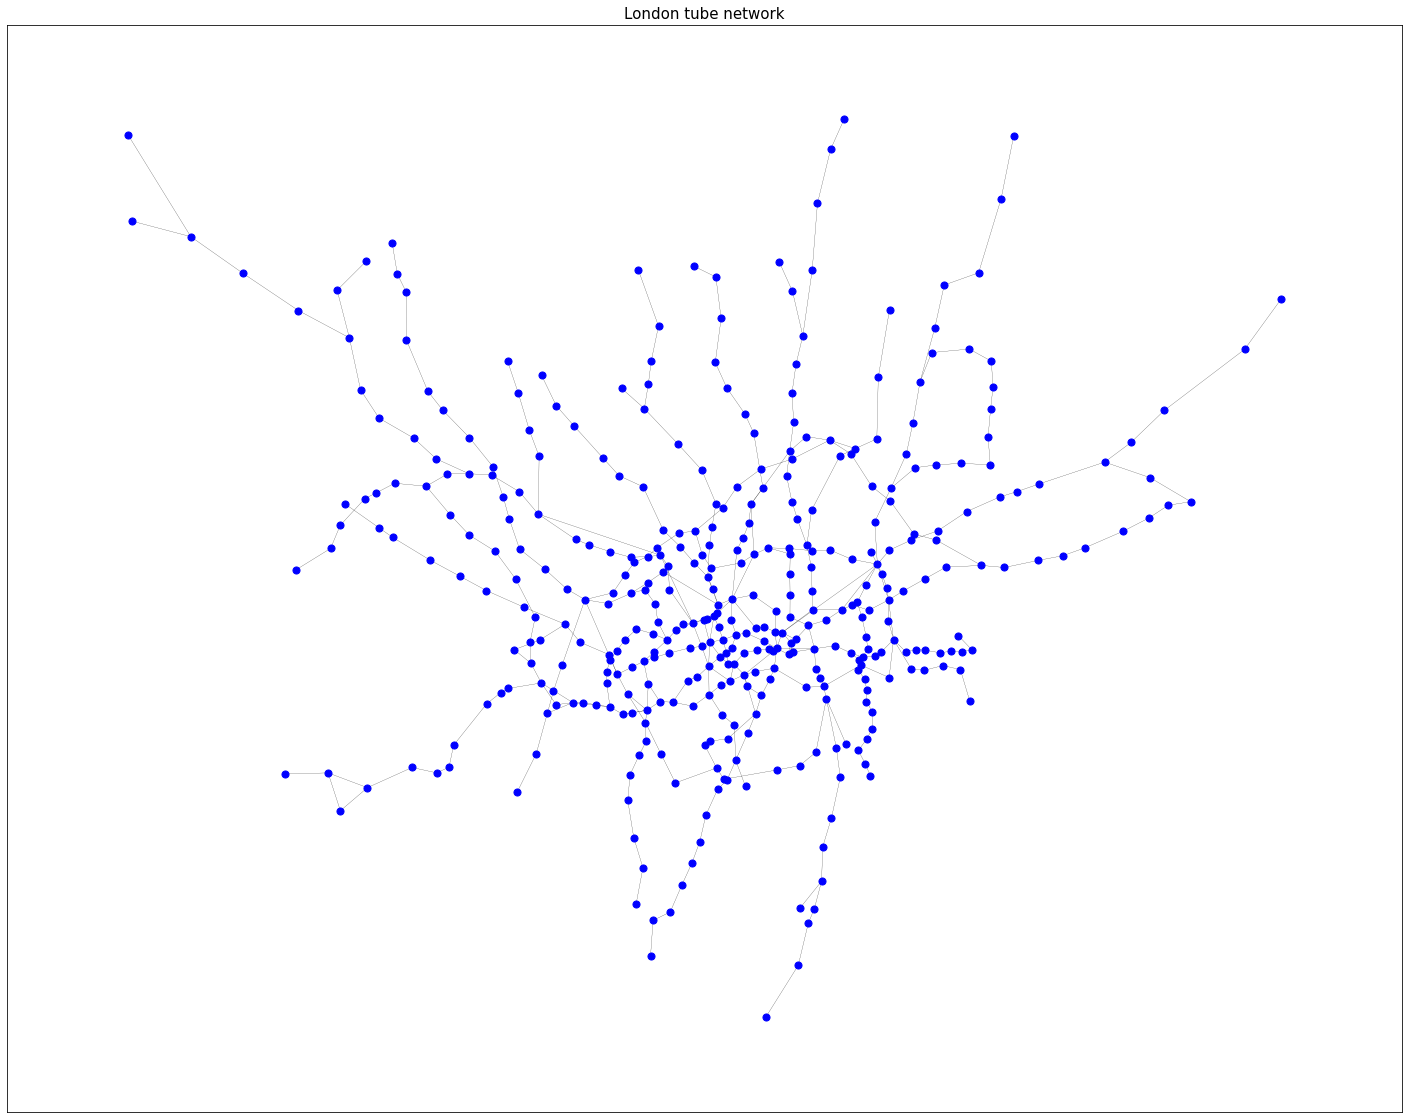

In [9]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("on")
plt.show()

In [10]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,length,line_name,flows
0,Wembley Park,Kingsbury,2916.771558,Jubilee,12356
1,Wembley Park,Neasden,2353.165938,Jubilee,6744
2,Wembley Park,Preston Road,1419.735166,Metropolitan,36601
3,Wembley Park,Finchley Road,7266.373927,Metropolitan,55216
4,Kingsbury,Queensbury,1245.995234,Jubilee,9419
5,Queensbury,Canons Park,1693.307343,Jubilee,6385
6,Canons Park,Stanmore,1419.669476,Jubilee,3624
7,Stratford,West Ham,1673.509515,Jubilee,91801
8,Stratford,Mile End,2805.001392,Central,12010
9,Stratford,Leyton,2131.342926,Central,56082


In [11]:
#  Degree centrality 
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [12]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


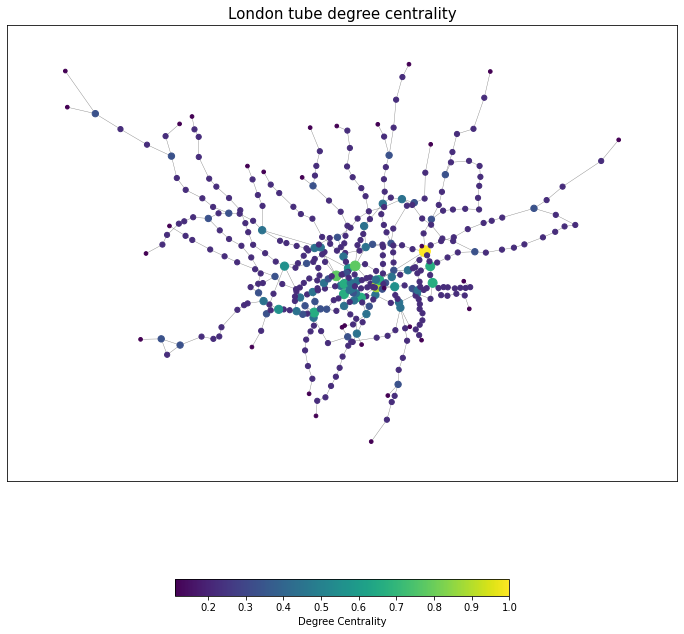

In [13]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*120 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

In [14]:
# Betweenness centrality
# Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


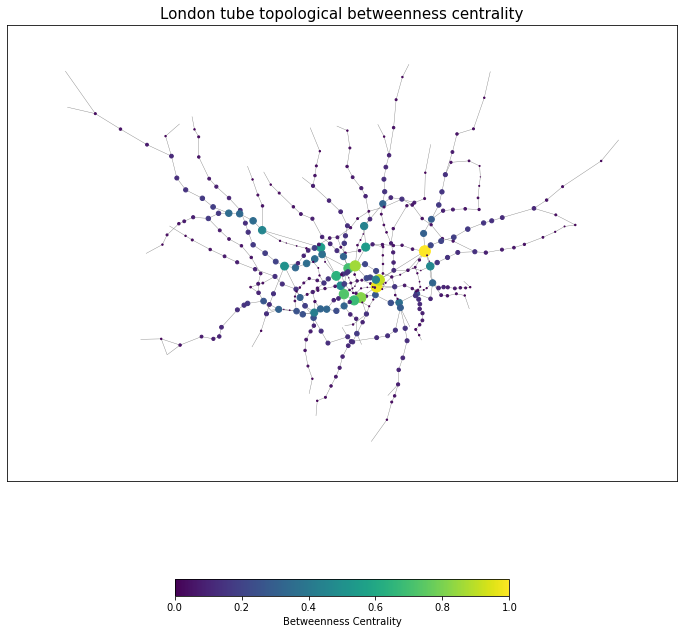

In [15]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*120 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

In [16]:
# Closeness centrality
# topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


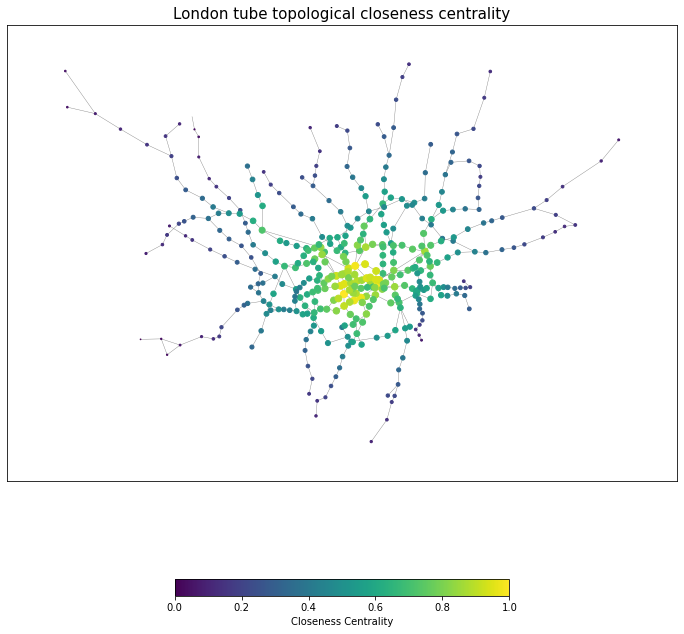

In [17]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

In [18]:
# I.2. Impact measures
# Here I choose two methods, global efficiency and average clustering coefficient, to evaluate the impact of node removal on the network.

In [19]:
# I.3. Node removal:
# A)non-sequential removal
# betweenness centrality

G_ac=nx.average_clustering(G)
G_ge=nx.global_efficiency(G)
print(G_ac)
print(G_ge)

0.030382377389858693
0.1012561935972123


In [20]:
G1=G.copy()
#To remove nodes: 
#If we want to remove the node with the max value of betweenness centrality:

maxbet=[n for n in G1.nodes() if G1.nodes[n]['betweenness_t'] == max(betweenness_t_values)]
print(maxbet)
G1.remove_nodes_from(maxbet)

['Stratford']


In [21]:
bet_ac=nx.average_clustering(G1)
bet_ge=nx.global_efficiency(G1)
print(bet_ac)
print(bet_ge)

0.030625000000000003
0.08891736066510689


In [22]:
# To remove 2 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_two=[e for e,v in values_sorted[:2]]
sorted_two

['Stratford', 'Bank and Monument']

In [23]:
#Remove nodes:
G1.remove_nodes_from(sorted_two)
bet_ac=nx.average_clustering(G1)
bet_ge=nx.global_efficiency(G1)
print(bet_ac)
print(bet_ge)

0.030027449576321755
0.08586164448742485


In [24]:
# To remove 3 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_three=[e for e,v in values_sorted[:3]]
print(sorted_three)
#Remove nodes:
G1.remove_nodes_from(sorted_three)
bet_ac=nx.average_clustering(G1)
bet_ge=nx.global_efficiency(G1)
print(bet_ac)
print(bet_ge)

['Stratford', 'Bank and Monument', 'Liverpool Street']
0.030102895429528594
0.08496349266423939


In [25]:
# To remove 4 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_four=[e for e,v in values_sorted[:4]]
print(sorted_four)
#Remove nodes:
G1.remove_nodes_from(sorted_four)
bet_ac=nx.average_clustering(G1)
bet_ge=nx.global_efficiency(G1)
print(bet_ac)
print(bet_ge)

['Stratford', 'Bank and Monument', 'Liverpool Street', "King's Cross St. Pancras"]
0.03034664747511095
0.07849775440713821


In [26]:
# To remove 5 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_five=[e for e,v in values_sorted[:5]]
print(sorted_five)
#Remove nodes:
G1.remove_nodes_from(sorted_five)
bet_ac=nx.average_clustering(G1)
bet_ge=nx.global_efficiency(G1)
print(bet_ac)
print(bet_ge)

['Stratford', 'Bank and Monument', 'Liverpool Street', "King's Cross St. Pancras", 'Waterloo']
0.02932900432900433
0.07594226578366223


In [27]:
# To remove 6 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_six=[e for e,v in values_sorted[:6]]
print(sorted_six)
#Remove nodes:
G1.remove_nodes_from(sorted_six)
bet_ac=nx.average_clustering(G1)
bet_ge=nx.global_efficiency(G1)
print(bet_ac)
print(bet_ge)

['Stratford', 'Bank and Monument', 'Liverpool Street', "King's Cross St. Pancras", 'Waterloo', 'Green Park']
0.028306208559373113
0.07415154167648695


In [28]:
# To remove 7 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_seven=[e for e,v in values_sorted[:7]]
print(sorted_seven)
#Remove nodes:
G1.remove_nodes_from(sorted_seven)
bet_ac=nx.average_clustering(G1)
bet_ge=nx.global_efficiency(G1)
print(bet_ac)
print(bet_ge)

['Stratford', 'Bank and Monument', 'Liverpool Street', "King's Cross St. Pancras", 'Waterloo', 'Green Park', 'Euston']
0.024993956973652406
0.06820564659789057


In [29]:
# To remove 8 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_eight=[e for e,v in values_sorted[:8]]
print(sorted_eight)
#Remove nodes:
G1.remove_nodes_from(sorted_eight)
bet_ac=nx.average_clustering(G1)
bet_ge=nx.global_efficiency(G1)
print(bet_ac)
print(bet_ge)

['Stratford', 'Bank and Monument', 'Liverpool Street', "King's Cross St. Pancras", 'Waterloo', 'Green Park', 'Euston', 'Westminster']
0.025057554828547195
0.06765950327361094


In [30]:
# To remove 9 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_nine=[e for e,v in values_sorted[:9]]
print(sorted_nine)
#Remove nodes:
G1.remove_nodes_from(sorted_nine)
bet_ac=nx.average_clustering(G1)
bet_ge=nx.global_efficiency(G1)
print(bet_ac)
print(bet_ge)

['Stratford', 'Bank and Monument', 'Liverpool Street', "King's Cross St. Pancras", 'Waterloo', 'Green Park', 'Euston', 'Westminster', 'Baker Street']
0.021598639455782314
0.064700058053009


In [31]:
# To remove 10 highest values:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_ten=[e for e,v in values_sorted[:10]]
print(sorted_ten)
#Remove nodes:
G1.remove_nodes_from(sorted_ten)
bet_ac=nx.average_clustering(G1)
bet_ge=nx.global_efficiency(G1)
print(bet_ac)
print(bet_ge)

['Stratford', 'Bank and Monument', 'Liverpool Street', "King's Cross St. Pancras", 'Waterloo', 'Green Park', 'Euston', 'Westminster', 'Baker Street', 'Finchley Road']
0.0216538789428815
0.06313903700825897


In [32]:
# this part is to remove the highest 10 closeness centrality values
# we will use the more advanced methods but not to calculate one by one
G2=G.copy()
clo_ac=[]
clo_ge=[]

clo_ac.append(nx.average_clustering(G2))
clo_ge.append(nx.global_efficiency(G2))

for i in range(10):
    
    print(f'{i+1} nodes removed')
    
    closeness_t_values=[(i[1]['closeness_t']) for i in G2.nodes(data=True)]
    
    maxclo=[n for n in G2.nodes() if G2.nodes[n]['closeness_t'] == max(closeness_t_values)]
    
    print(f'remove node: {maxclo}')
    
    G2.remove_nodes_from(maxclo)
    
    
    clo_ac.append(nx.average_clustering(G2))
    clo_ge.append(nx.global_efficiency(G2))
    
    print(f'The average clustering value is: {nx.average_clustering(G2)} ')
    print(f'The global efficiency value is: {nx.global_efficiency(G2)} ')

1 nodes removed
remove node: ['Green Park']
The average clustering value is: 0.02979166666666667 
The global efficiency value is: 0.09918991960788402 
2 nodes removed
remove node: ['Bank and Monument']
The average clustering value is: 0.02927556987707364 
The global efficiency value is: 0.09487232544791133 
3 nodes removed
remove node: ["King's Cross St. Pancras"]
The average clustering value is: 0.02951663077291218 
The global efficiency value is: 0.08793385149140875 
4 nodes removed
remove node: ['Westminster']
The average clustering value is: 0.028079644956219268 
The global efficiency value is: 0.08737164566976727 
5 nodes removed
remove node: ['Waterloo']
The average clustering value is: 0.028150553150553155 
The global efficiency value is: 0.08485943799789313 
6 nodes removed
remove node: ['Oxford Circus']
The average clustering value is: 0.02990958408679928 
The global efficiency value is: 0.08278135073141742 
7 nodes removed
remove node: ['Bond Street']
The average clustering v

In [33]:
# this part is to remove the highest 10 degree centrality values
# we will use the more advanced methods but not to calculate one by one
G3=G.copy()
deg_ac=[]
deg_ge=[]

deg_ac.append(nx.average_clustering(G3))
deg_ge.append(nx.global_efficiency(G3))

for i in range(10):
    
    print(f'{i+1} nodes removed')
    
    degree_values=[(i[1]['degree']) for i in G3.nodes(data=True)]
    
    maxdeg=[n for n in G3.nodes() if G3.nodes[n]['degree'] == max(degree_values)]
    
    print(f'remove node: {maxdeg}')
    
    G3.remove_nodes_from(maxdeg)
    
    
    deg_ac.append(nx.average_clustering(G3))
    deg_ge.append(nx.global_efficiency(G3))
    
    print(f'The average clustering value is: {nx.average_clustering(G3)} ')
    print(f'The global efficiency value is: {nx.global_efficiency(G3)} ')


1 nodes removed
remove node: ['Stratford']
The average clustering value is: 0.030625000000000003 
The global efficiency value is: 0.08891736066510689 
2 nodes removed
remove node: ['Bank and Monument']
The average clustering value is: 0.030027449576321755 
The global efficiency value is: 0.08586164448742485 
3 nodes removed
remove node: ['Baker Street', "King's Cross St. Pancras"]
The average clustering value is: 0.027287993282955506 
The global efficiency value is: 0.07570039409751211 
4 nodes removed
remove node: ['West Ham', 'Canning Town', 'Waterloo', 'Green Park', 'Oxford Circus', 'Liverpool Street', "Earl's Court"]
The average clustering value is: 0.016923076923076923 
The global efficiency value is: 0.062061403668075166 
5 nodes removed
remove node: ['Willesden Junction', 'Shadwell', 'Euston', 'Turnham Green']
The average clustering value is: 0.010362694300518135 
The global efficiency value is: 0.04309736951968584 
6 nodes removed
remove node: ['Wembley Park', 'Canary Wharf', '

ZeroDivisionError: division by zero

In [34]:
# B) sequential removal

In [35]:
# betweenness centrality
G4=G.copy()
# To remove the highest value:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G4.remove_nodes_from(sorted_one)
bet_ac=nx.average_clustering(G4)
bet_ge=nx.global_efficiency(G4)
print(bet_ac)
print(bet_ge)

['Stratford']
0.030625000000000003
0.08891736066510689


In [36]:
#Let us compute the betweenness centrality for the new network, without using weights:
bet_london_t_new=nx.betweenness_centrality(G4, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G4,bet_london_t_new,'betweenness_t_new')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G4.nodes())
df['betweenness_t_new'] = pd.Series(nx.get_node_attributes(G4, 'betweenness_t_new'))

df_sorted = df.sort_values(["betweenness_t_new"], ascending=False)
df_sorted[0:10]

,betweenness_t_new
King's Cross St. Pancras,19632.883550
Bank and Monument,16189.930087
Euston,15681.102778
Highbury & Islington,14784.085931
Baker Street,13681.567136
Waterloo,13292.924892
Green Park,12745.906025
Finsbury Park,12299.226407
Finchley Road,12180.319913
Canada Water,12115.210714


In [37]:
G4_ac=nx.average_clustering(G4)
G4_ge=nx.global_efficiency(G4)
print(G4_ac)
print(G4_ge)

0.030625000000000003
0.08891736066510689


In [38]:
print(nx.info(G4))

Graph with 400 nodes and 458 edges


In [39]:
# To remove the highest value in the new network:
# List of nodes:
values_sorted = sorted(bet_london_t_new.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G4.remove_nodes_from(sorted_one)
bet_ac=nx.average_clustering(G4)
bet_ge=nx.global_efficiency(G4)
print(bet_ac)
print(bet_ge)

["King's Cross St. Pancras"]
0.030868838763575608
0.08460293133575152


In [40]:
print(nx.info(G4))

Graph with 399 nodes and 451 edges


In [41]:
#Let us compute the betweenness centrality for the new network, without using weights:
bet_london_t_new=nx.betweenness_centrality(G4, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G4,bet_london_t_new,'betweenness_t_new')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G4.nodes())
df['betweenness_t_new'] = pd.Series(nx.get_node_attributes(G4, 'betweenness_t_new'))

df_sorted = df.sort_values(["betweenness_t_new"], ascending=False)
df_sorted[0:10]

,betweenness_t_new
Waterloo,20080.980760
Bank and Monument,19144.467332
Green Park,18186.478385
Westminster,17218.913235
Finchley Road,14393.783054
Baker Street,13458.302101
West Hampstead,12864.995752
Canada Water,12392.237430
Willesden Junction,11285.184294
Bond Street,11006.952616


In [42]:
# To remove the highest value in the new network:
# List of nodes:
values_sorted = sorted(bet_london_t_new.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G4.remove_nodes_from(sorted_one)
bet_ac=nx.average_clustering(G4)
bet_ge=nx.global_efficiency(G4)
print(bet_ac)
print(bet_ge)

['Waterloo']
0.02997128499641063
0.08182895253292936


In [43]:
print(nx.info(G4))

Graph with 398 nodes and 445 edges


In [44]:
#Let us compute the betweenness centrality for the new network, without using weights:
bet_london_t_new=nx.betweenness_centrality(G4, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G4,bet_london_t_new,'betweenness_t_new')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G4.nodes())
df['betweenness_t_new'] = pd.Series(nx.get_node_attributes(G4, 'betweenness_t_new'))

df_sorted = df.sort_values(["betweenness_t_new"], ascending=False)
df_sorted[0:10]

,betweenness_t_new
Bank and Monument,16872.849206
Finchley Road,15055.303968
Canada Water,14336.566667
Oxford Circus,14324.949206
West Hampstead,14080.100000
Baker Street,13427.806349
Holborn,12876.052381
Tottenham Court Road,12605.135714
Chancery Lane,12603.044444
St. Paul's,12595.711111


In [45]:
# To remove the highest value in the new network:
# List of nodes:
values_sorted = sorted(bet_london_t_new.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G4.remove_nodes_from(sorted_one)
bet_ac=nx.average_clustering(G4)
bet_ge=nx.global_efficiency(G4)
print(bet_ac)
print(bet_ge)

['Bank and Monument']
0.02925512774379273
0.07767794342812263


In [46]:
print(nx.info(G4))

Graph with 397 nodes and 438 edges


In [47]:
#Let us compute the betweenness centrality for the new network, without using weights:
bet_london_t_new=nx.betweenness_centrality(G4, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G4,bet_london_t_new,'betweenness_t_new')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G4.nodes())
df['betweenness_t_new'] = pd.Series(nx.get_node_attributes(G4, 'betweenness_t_new'))

df_sorted = df.sort_values(["betweenness_t_new"], ascending=False)
df_sorted[0:10]

,betweenness_t_new
Canada Water,19153.841667
West Hampstead,18340.209921
Finchley Road,17667.151984
Gospel Oak,16164.391667
Finchley Road & Frognal,16140.391667
Hampstead Heath,16066.391667
Baker Street,14319.985317
Canary Wharf,13716.833333
Willesden Junction,12416.992063
Surrey Quays,12204.383333


In [48]:
# To remove the highest value in the new network:
# List of nodes:
values_sorted = sorted(bet_london_t_new.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G4.remove_nodes_from(sorted_one)
bet_ac=nx.average_clustering(G4)
bet_ge=nx.global_efficiency(G4)
print(bet_ac)
print(bet_ge)

['Canada Water']
0.02932900432900433
0.07283234083472483


In [49]:
print(nx.info(G4))

Graph with 396 nodes and 434 edges


In [50]:
#Let us compute the betweenness centrality for the new network, without using weights:
bet_london_t_new=nx.betweenness_centrality(G4, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G4,bet_london_t_new,'betweenness_t_new')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G4.nodes())
df['betweenness_t_new'] = pd.Series(nx.get_node_attributes(G4, 'betweenness_t_new'))

df_sorted = df.sort_values(["betweenness_t_new"], ascending=False)
df_sorted[0:10]

# To remove the highest value in the new network:
# List of nodes:
values_sorted = sorted(bet_london_t_new.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G4.remove_nodes_from(sorted_one)
bet_ac=nx.average_clustering(G4)
bet_ge=nx.global_efficiency(G4)
print(bet_ac)
print(bet_ge)

print(nx.info(G4))

['West Hampstead']
0.029403254972875225
0.053210203984026455
Graph with 395 nodes and 430 edges


In [51]:
#Let us compute the betweenness centrality for the new network, without using weights:
bet_london_t_new=nx.betweenness_centrality(G4, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G4,bet_london_t_new,'betweenness_t_new')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G4.nodes())
df['betweenness_t_new'] = pd.Series(nx.get_node_attributes(G4, 'betweenness_t_new'))

df_sorted = df.sort_values(["betweenness_t_new"], ascending=False)
df_sorted[0:10]

# To remove the highest value in the new network:
# List of nodes:
values_sorted = sorted(bet_london_t_new.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G4.remove_nodes_from(sorted_one)
bet_ac=nx.average_clustering(G4)
bet_ge=nx.global_efficiency(G4)
print(bet_ac)
print(bet_ge)

print(nx.info(G4))

["Earl's Court"]
0.022625090645395213
0.05165629952389727
Graph with 394 nodes and 424 edges


In [52]:
#Let us compute the betweenness centrality for the new network, without using weights:
bet_london_t_new=nx.betweenness_centrality(G4, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G4,bet_london_t_new,'betweenness_t_new')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G4.nodes())
df['betweenness_t_new'] = pd.Series(nx.get_node_attributes(G4, 'betweenness_t_new'))

df_sorted = df.sort_values(["betweenness_t_new"], ascending=False)
df_sorted[0:10]

# To remove the highest value in the new network:
# List of nodes:
values_sorted = sorted(bet_london_t_new.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G4.remove_nodes_from(sorted_one)
bet_ac=nx.average_clustering(G4)
bet_ge=nx.global_efficiency(G4)
print(bet_ac)
print(bet_ge)

print(nx.info(G4))

["Shepherd's Bush"]
0.022682660850599782
0.0458442134055722
Graph with 393 nodes and 420 edges


In [53]:
#Let us compute the betweenness centrality for the new network, without using weights:
bet_london_t_new=nx.betweenness_centrality(G4, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G4,bet_london_t_new,'betweenness_t_new')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G4.nodes())
df['betweenness_t_new'] = pd.Series(nx.get_node_attributes(G4, 'betweenness_t_new'))

df_sorted = df.sort_values(["betweenness_t_new"], ascending=False)
df_sorted[0:10]

# To remove the highest value in the new network:
# List of nodes:
values_sorted = sorted(bet_london_t_new.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G4.remove_nodes_from(sorted_one)
bet_ac=nx.average_clustering(G4)
bet_ge=nx.global_efficiency(G4)
print(bet_ac)
print(bet_ge)

print(nx.info(G4))

['Euston']
0.01933916423712342
0.04163076968121037
Graph with 392 nodes and 416 edges


In [54]:
#Let us compute the betweenness centrality for the new network, without using weights:
bet_london_t_new=nx.betweenness_centrality(G4, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G4,bet_london_t_new,'betweenness_t_new')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G4.nodes())
df['betweenness_t_new'] = pd.Series(nx.get_node_attributes(G4, 'betweenness_t_new'))

df_sorted = df.sort_values(["betweenness_t_new"], ascending=False)
df_sorted[0:10]

# To remove the highest value in the new network:
# List of nodes:
values_sorted = sorted(bet_london_t_new.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G4.remove_nodes_from(sorted_one)
bet_ac=nx.average_clustering(G4)
bet_ge=nx.global_efficiency(G4)
print(bet_ac)
print(bet_ge)

print(nx.info(G4))

['Baker Street']
0.016283034953111678
0.0381637040943985
Graph with 391 nodes and 409 edges


In [55]:
# Now we have removed ten nodes, but this is a tiring way to do it, 
# so next we will use the loop function to save time and make our process look more nearly clear
# this is the part of closeness centrality

In [56]:
G5=G.copy()
clo_ac=[]
clo_ge=[]

clo_ac.append(nx.average_clustering(G5))
clo_ge.append(nx.global_efficiency(G5))

for i in range(10):
    
    print(f'{i+1} nodes removed')
    
    clos_t_new=nx.closeness_centrality(G5)
    
    nx.set_node_attributes(G5,clos_t_new,'closeness_t')
    
    closeness_t_values=[(i[1]['closeness_t']) for i in G5.nodes(data=True)]
    
    maxclo=[n for n in G5.nodes() if G5.nodes[n]['closeness_t'] == max(closeness_t_values)]
    
    print(f'remove node: {maxclo}')
    
    G5.remove_nodes_from(maxclo)
    
    
    clo_ac.append(nx.average_clustering(G5))
    clo_ge.append(nx.global_efficiency(G5))
    
    print(f'The average clustering value is: {nx.average_clustering(G5)} ')
    print(f'The global efficiency value is: {nx.global_efficiency(G5)} ')
    

1 nodes removed
remove node: ['Green Park']
The average clustering value is: 0.02979166666666667 
The global efficiency value is: 0.09918991960788402 
2 nodes removed
remove node: ["King's Cross St. Pancras"]
The average clustering value is: 0.03003341687552214 
The global efficiency value is: 0.09443475025566316 
3 nodes removed
remove node: ['Waterloo']
The average clustering value is: 0.028715003589375454 
The global efficiency value is: 0.09181648060183005 
4 nodes removed
remove node: ['Bank and Monument']
The average clustering value is: 0.028079644956219268 
The global efficiency value is: 0.08542563066911478 
5 nodes removed
remove node: ['West Hampstead']
The average clustering value is: 0.028150553150553155 
The global efficiency value is: 0.08054424756502003 
6 nodes removed
remove node: ['Canada Water']
The average clustering value is: 0.02822182037371911 
The global efficiency value is: 0.05810104159173278 
7 nodes removed
remove node: ['Stratford']
The average clustering 

In [57]:
# this is the part of degree centrality
G6=G.copy()
deg_ac=[]
deg_ge=[]

deg_ac.append(nx.average_clustering(G6))
deg_ge.append(nx.global_efficiency(G6))

for i in range(10):
    
    print(f'{i+1} nodes removed')
    
    deg_new=nx.degree_centrality(G6)
    
    nx.set_node_attributes(G6,deg_new,'degree')
    
    degree_values=[(i[1]['degree']) for i in G6.nodes(data=True)]
    
    maxdeg=[n for n in G6.nodes() if G6.nodes[n]['degree'] == max(degree_values)]
    
    print(f'remove node: {maxdeg}')
    
    G6.remove_nodes_from(maxdeg)
    
    
    deg_ac.append(nx.average_clustering(G6))
    deg_ge.append(nx.global_efficiency(G6))
    
    print(f'The average clustering value is: {nx.average_clustering(G6)} ')
    print(f'The global efficiency value is: {nx.global_efficiency(G6)} ')

1 nodes removed
remove node: ['Stratford']
The average clustering value is: 0.030625000000000003 
The global efficiency value is: 0.08891736066510689 
2 nodes removed
remove node: ['Bank and Monument']
The average clustering value is: 0.030027449576321755 
The global efficiency value is: 0.08586164448742485 
3 nodes removed
remove node: ['Baker Street', "King's Cross St. Pancras"]
The average clustering value is: 0.027287993282955506 
The global efficiency value is: 0.07570039409751211 
4 nodes removed
remove node: ['Canning Town', 'Green Park', 'Oxford Circus', "Earl's Court"]
The average clustering value is: 0.0183206106870229 
The global efficiency value is: 0.0666869485473866 
5 nodes removed
remove node: ['Waterloo', 'Willesden Junction', 'Turnham Green']
The average clustering value is: 0.013675213675213672 
The global efficiency value is: 0.05472864295219614 
6 nodes removed
remove node: ['Wembley Park', 'West Ham', 'Canary Wharf', 'Canada Water', 'West Hampstead', 'Notting Hill

ZeroDivisionError: division by zero

In [58]:
# II. Flows: weighted network 
# II.1 Old vs new measure
# Weighted betweenness centrality
bet_london_w=nx.betweenness_centrality(G,weight='flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,betweenness_w
West Hampstead,28401.50
Gospel Oak,21947.00
Finchley Road & Frognal,21446.00
Hampstead Heath,21372.00
Willesden Junction,19166.50
Leicester Square,17097.75
Brondesbury,16526.00
Brondesbury Park,16411.50
Kensal Rise,16299.75
Blackhorse Road,16091.75


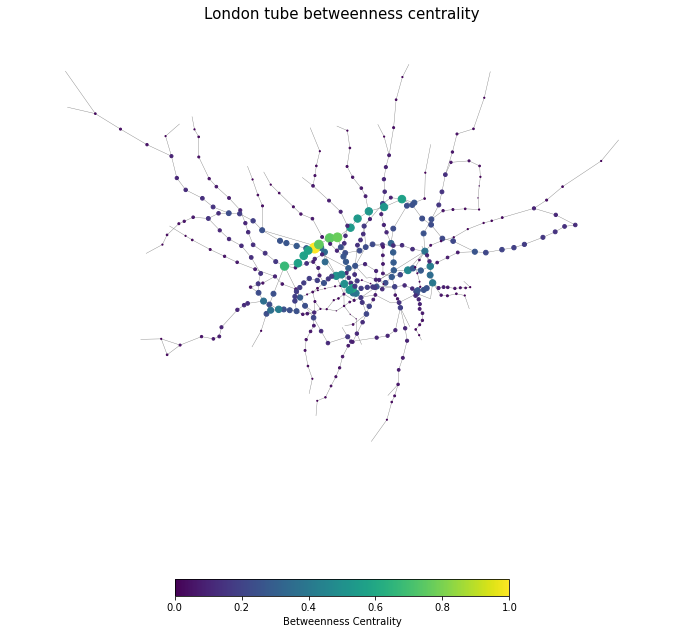

In [59]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()

In [60]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

,closeness_w
Holborn,0.000079
King's Cross St. Pancras,0.000079
Tottenham Court Road,0.000079
Oxford Circus,0.000079
Leicester Square,0.000078
Piccadilly Circus,0.000078
Charing Cross,0.000078
Chancery Lane,0.000078
Covent Garden,0.000078
Embankment,0.000078


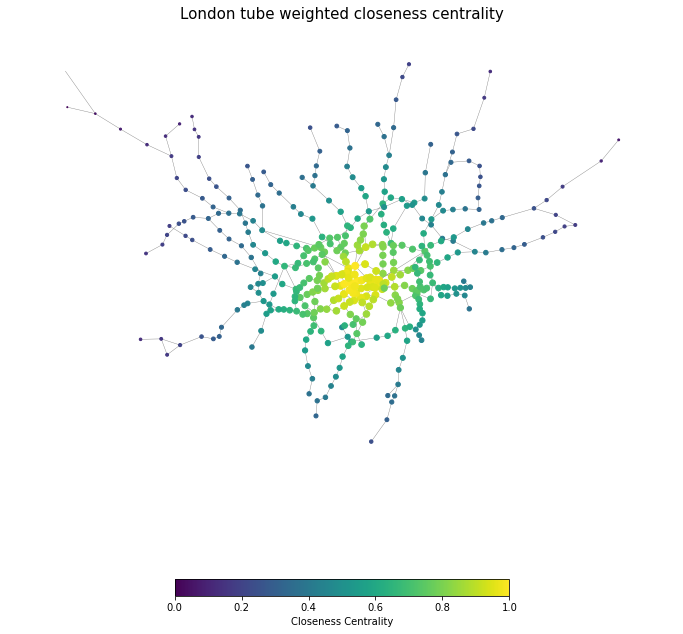

In [61]:
# Lets set color and width of nodes according to the closeness values

clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube weighted closeness centrality",fontsize=15)
plt.show()

In [62]:
# II.2 Impact measure with flows
# Here we will use the average shortest path length instead of the average clustering coefficient. Apart from this, we keep global efficiency as a measure for evaluation, as global efficiency is very effective in weighted networks.
# II.3 Experiment with flows 
# number of connected components
nx.number_connected_components(G)

1

In [63]:
# To comput the size ( number of node) of each component
Subg = [G.subgraph(c).copy() for c in nx.connected_components(G)]
[len(subgraph.nodes) for subgraph in Subg]

[401]

In [65]:
# unweighted betweenness centrality
G7=G.copy()
# To remove the highest value:
# List of nodes:
values_sorted = sorted(bet_london_t.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G7.remove_nodes_from(sorted_one)

bet_ge=nx.global_efficiency(G7)
print(bet_ge)



['Stratford']
0.08891736066510689


In [66]:
nx.number_connected_components(G7)


3

In [67]:
# To comput the size ( number of node) of each component
Subg = [G.subgraph(c).copy() for c in nx.connected_components(G7)]
[len(subgraph.nodes) for subgraph in Subg]


[379, 20, 1]

In [68]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G7)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph_G7 = G7.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph_G7.number_of_nodes()

379

In [69]:
# weighted betweenness centrality
G8=G.copy()
# To remove the highest value:
# List of nodes:
values_sorted = sorted(bet_london_w.items(), key=itemgetter(1), reverse=True)
sorted_one=[e for e,v in values_sorted[:1]]
print(sorted_one)
#Remove nodes:
G8.remove_nodes_from(sorted_one)

bet_ge=nx.global_efficiency(G8)
print(bet_ge)



['West Hampstead']
0.10005038744672845


In [70]:
nx.number_connected_components(G8)

1

In [71]:
# To comput the size ( number of node) of each component
Subg = [G.subgraph(c).copy() for c in nx.connected_components(G8)]
[len(subgraph.nodes) for subgraph in Subg]


[400]

In [72]:
# To obtain the largest component as a new graph: 

# Get the list of components:
components = nx.connected_components(G8)
# Use the max() command to find the largest one:
largest_component = max(components, key=len)
# Create a "subgraph" of the largest component
Largest_subgraph = G8.subgraph(largest_component)
# To coumpute the size of the largest component:
Largest_subgraph.number_of_nodes()

400

In [74]:
# Calculate the average shortest path length before removing nodes
bet_sp=nx.average_shortest_path_length(G)
print(bet_sp)

13.545997506234414


In [75]:
# Calculate the average shortest path length after removing nodes from the weighted network
bet_sp=nx.average_shortest_path_length(G8)

In [76]:
print(bet_sp)

13.710764411027569


In [77]:
# Calculate the average shortest path length after removing nodes from the un-weighted network
bet_sp=nx.average_shortest_path_length(Largest_subgraph_G7)
print(bet_sp)

14.496447069006436


In [78]:
# Part2 Spatial Interaction models 
# III. Models and calibration
# III.1 Spatial interaction models

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

/Users/luuuu/Desktop/CASA/anaconda3/envs/sds2021/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [80]:

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)   
    return RMSE

def HowGood(observed, estimated):
    '''
    This function returen the results of RSquared and RMSE
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values
    '''
    print(f'The RSquared is: '+str(CalcRSqaured(observed,estimated)))
    print(f'The RMSE is: '+str(CalcRMSE(observed,estimated)))

In [81]:
orig_dest = pd.read_csv("london_flows.csv")
orig_dest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [82]:
orig_dest = orig_dest.drop(orig_dest[orig_dest['population']==0].index)
orig_dest = orig_dest.drop(orig_dest[orig_dest['jobs']==0].index)
orig_dest = orig_dest.drop(orig_dest[orig_dest['flows']==0].index)
orig_dest = orig_dest.drop(orig_dest[orig_dest['distance']==0].index)

In [83]:
orig_dest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43945 entries, 1 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       43945 non-null  object 
 1   station_destination  43945 non-null  object 
 2   flows                43945 non-null  int64  
 3   population           43945 non-null  int64  
 4   jobs                 43945 non-null  int64  
 5   distance             43945 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ MB


In [84]:
london_od=orig_dest.dropna()

In [85]:
london_od.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43945 entries, 1 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       43945 non-null  object 
 1   station_destination  43945 non-null  object 
 2   flows                43945 non-null  int64  
 3   population           43945 non-null  int64  
 4   jobs                 43945 non-null  int64  
 5   distance             43945 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ MB


In [86]:
#take the variables and produce logarithms of them
x_variables = ["population", "jobs","distance"]
log_x_vars = []
for x in x_variables:
    london_od[f"log_{x}"] = np.log(london_od[x])
    log_x_vars.append(f"log_{x}")
london_od

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842
...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832


In [87]:
# 1 The Unconstrained Model
# The negative exponential
formula1 = 'flows ~ log_population + log_jobs + distance-1'
uncon_ne = smf.glm(formula = formula1, data=london_od, family=sm.families.Poisson()).fit()
london_od['uncon_ne']=np.round(uncon_ne.predict(),0)
HowGood(london_od["flows"],london_od["uncon_ne"])
print('___________________________________________________________________________________')
#The inverse power
formula2 = 'flows ~ log_population + log_jobs + log_distance-1'
uncon_ip = smf.glm(formula = formula2, data=london_od, family=sm.families.Poisson()).fit()
london_od['uncon_ip']=np.round(uncon_ip.predict(),0)
HowGood(london_od["flows"],london_od["uncon_ip"])

The RSquared is: 0.17836392416139646
The RMSE is: 141.709
___________________________________________________________________________________
The RSquared is: 0.2514113819585743
The RMSE is: 133.5


In [88]:
# it is clear that the second is much better
print(uncon_ip.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                43945
Model:                            GLM   Df Residuals:                    43942
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1937e+06
Date:                Mon, 09 May 2022   Deviance:                   2.2153e+06
Time:                        21:57:25   Pearson chi2:                 3.96e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
log_population     0.5993      0.001   1076.

In [89]:
# 2 Production-constrained Model
# The inverse power
formula3 = 'flows ~ station_origin + log_jobs + log_distance-1'
pro_ip = smf.glm(formula = formula3, data=london_od, family=sm.families.Poisson()).fit()
london_od['pro_ip']=np.round(pro_ip.predict(),0)
cdatasubmat1 = london_od.pivot_table(values ="pro_ip", index="station_origin", columns = "station_destination",aggfunc=np.sum, margins=True)

In [90]:
HowGood(london_od["flows"],london_od["pro_ip"])

The RSquared is: 0.39372592328634215
The RMSE is: 120.147


In [91]:
formula4 = 'flows ~ station_origin + log_jobs + distance-1'
pro_ne = smf.glm(formula = formula4, data=london_od, family=sm.families.Poisson()).fit()

In [92]:
london_od['pro_ne']=np.round(pro_ne.predict(),0)

In [93]:
cdatasubmat2 = london_od.pivot_table(values ="pro_ne", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1221.0
Acton Town,NaN,NaN,NaN,14.0,14.0,NaN,15.0,NaN,NaN,18.0,...,15.0,3.0,2.0,21.0,NaN,NaN,NaN,NaN,NaN,3753.0
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,...,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,2877.0
Aldgate East,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,...,3.0,NaN,NaN,3.0,NaN,1.0,NaN,1.0,NaN,3173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,43.0,54.0,NaN,NaN,NaN,NaN,32.0,...,3.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,2.0,20.0,20.0,NaN,NaN,NaN,NaN,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3086.0


In [94]:
HowGood(london_od["flows"],london_od["pro_ip"])
print('_________________________________________')
HowGood(london_od["flows"],london_od["pro_ne"])

The RSquared is: 0.39372592328634215
The RMSE is: 120.147
_________________________________________
The RSquared is: 0.46451380602588255
The RMSE is: 113.556


In [95]:
# we can extract these parameters
coefs = pd.DataFrame(pro_ne.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")

coefs

/var/folders/rk/48wsrbps3wj36pp9krx_1shw0000gn/T/ipykernel_82796/3093598131.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,coef,alpha_i
0,Abbey Road,-2.491868
1,Acton Central,-0.799247
2,Acton Town,-1.391881
3,Aldgate,-2.523238
4,Aldgate East,-2.532117
...,...,...
395,Woodgrange Park,-0.592262
396,Woodside Park,-0.995413
397,Woolwich Arsenal,0.711189
398,log_jobs,0.725617


In [96]:
# since we will use them to estimate the flows, we can also merge it into the initial dataframe
od = london_od.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
od.drop(columns = ["coef"], inplace = True)
#check this has worked
od

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,uncon_ne,uncon_ip,pro_ip,pro_ne,alpha_i
0,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,14.0,2.0,1.0,2.0,-2.491868
1,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,28.0,5.0,4.0,5.0,-2.491868
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,108.0,64.0,76.0,115.0,-2.491868
3,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,98.0,53.0,56.0,66.0,-2.491868
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,24.0,5.0,4.0,5.0,-2.491868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43940,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,29.0,25.0,132.0,107.0,0.711189
43941,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,61.0,47.0,269.0,301.0,0.711189
43942,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,23.0,9.0,37.0,40.0,0.711189
43943,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,50.0,22.0,106.0,131.0,0.711189


In [97]:
# Calculation of important parameter values
alpha_i = pro_ne.params[0:-2]
gamma = pro_ne.params[-2]
beta = pro_ne.params[-1]
print(beta)
print(gamma)
print(alpha_i)

-0.0001437329848912704
0.7256174748287529
station_origin[Abbey Road]         -2.491868
station_origin[Acton Central]      -0.799247
station_origin[Acton Town]         -1.391881
station_origin[Aldgate]            -2.523238
station_origin[Aldgate East]       -2.532117
                                      ...   
station_origin[Wood Street]        -0.184360
station_origin[Woodford]           -0.464289
station_origin[Woodgrange Park]    -0.592262
station_origin[Woodside Park]      -0.995413
station_origin[Woolwich Arsenal]    0.711189
Length: 398, dtype: float64


In [98]:
# 3 Attraction-Constrained Model
# The inverse power
formula5 = 'flows ~ log_population + station_destination + log_distance-1'
att_ip = smf.glm(formula = formula5, data=london_od, family=sm.families.Poisson()).fit()
london_od['att_ip']=np.round(uncon_ip.predict(),0)
HowGood(london_od["flows"],london_od["att_ip"])
print('___________________________________________________________________________________')
#The negative exponential
formula6 = 'flows ~ log_population + station_destination + distance-1'
att_ne = smf.glm(formula = formula6, data=london_od, family=sm.families.Poisson()).fit()
london_od['att_ne']=np.round(att_ne.predict(),0)
HowGood(london_od["flows"],london_od["att_ne"])

The RSquared is: 0.2514113819585743
The RMSE is: 133.5
___________________________________________________________________________________
The RSquared is: 0.3951090877869879
The RMSE is: 120.597


In [99]:
# 4 Doubly Constrained Model
# The inverse power
formula7 = 'flows ~ station_origin + station_destination + log_distance-1'
dou_ip = smf.glm(formula = formula7, data=london_od, family=sm.families.Poisson()).fit()
london_od['dou_ip']=np.round(dou_ip.predict(),0)
HowGood(london_od["flows"],london_od["dou_ip"])
print('___________________________________________________________________________________')
#The negative exponential
formula8 = 'flows ~ station_origin + station_destination + distance-1'
dou_ne = smf.glm(formula = formula8, data=london_od, family=sm.families.Poisson()).fit()
london_od['dou_ne']=np.round(dou_ne.predict(),0)
HowGood(london_od["flows"],london_od["dou_ne"])

The RSquared is: 0.41893772760573345
The RMSE is: 117.622
___________________________________________________________________________________
The RSquared is: 0.4997778698538133
The RMSE is: 109.598


In [100]:
# IV. Scenarios
# IV.1. Scenario A: Canary Wharf has a 50% decrease in jobs after Brexit

In [101]:
jobnumber=od[od.station_destination=='Canary Wharf']

In [102]:
jobnumber

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,uncon_ne,uncon_ip,pro_ip,pro_ne,alpha_i
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,108.0,64.0,76.0,115.0,-2.491868
90,Acton Town,Canary Wharf,57,3745,58772,20398.165882,8.228177,10.981421,9.923200,27.0,68.0,76.0,38.0,-1.391881
252,Aldgate,Canary Wharf,1,2886,58772,6564.419680,7.967627,10.981421,8.789419,135.0,136.0,68.0,90.0,-2.523238
387,Aldgate East,Canary Wharf,3,3172,58772,5127.998899,8.062118,10.981421,8.542471,165.0,174.0,87.0,110.0,-2.532117
535,All Saints,Canary Wharf,67,740,58772,1340.088733,6.606650,10.981421,7.200491,180.0,199.0,236.0,184.0,-2.562786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43185,Wimbledon Park,Canary Wharf,27,1664,58772,20878.891995,7.416980,10.981421,9.946494,21.0,41.0,44.0,22.0,-1.872990
43306,Wood Green,Canary Wharf,64,6667,58772,16849.246595,8.804925,10.981421,9.732061,48.0,111.0,150.0,106.0,-0.886326
43598,Woodford,Canary Wharf,192,4868,58772,13963.787075,8.490438,10.981421,9.544223,63.0,106.0,180.0,244.0,-0.464289
43792,Woodside Park,Canary Wharf,42,3093,58772,22356.567178,8.036897,10.981421,10.014875,20.0,57.0,78.0,43.0,-0.995413


In [103]:
# we can see the job number is 58772, so after Brexit the job number has been reduced to 58772/2=29386
newjob = 29386

def new_sal(row):
    if row["station_destination"] == 'Canary Wharf': val = 29386
    else: val = row["jobs"]
    return val
        
od["Job_scenario_A"] = od.apply(new_sal, axis =1)

In [104]:
od[od.station_destination=='Canary Wharf']

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,uncon_ne,uncon_ip,pro_ip,pro_ne,alpha_i,Job_scenario_A
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,108.0,64.0,76.0,115.0,-2.491868,29386
90,Acton Town,Canary Wharf,57,3745,58772,20398.165882,8.228177,10.981421,9.923200,27.0,68.0,76.0,38.0,-1.391881,29386
252,Aldgate,Canary Wharf,1,2886,58772,6564.419680,7.967627,10.981421,8.789419,135.0,136.0,68.0,90.0,-2.523238,29386
387,Aldgate East,Canary Wharf,3,3172,58772,5127.998899,8.062118,10.981421,8.542471,165.0,174.0,87.0,110.0,-2.532117,29386
535,All Saints,Canary Wharf,67,740,58772,1340.088733,6.606650,10.981421,7.200491,180.0,199.0,236.0,184.0,-2.562786,29386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43185,Wimbledon Park,Canary Wharf,27,1664,58772,20878.891995,7.416980,10.981421,9.946494,21.0,41.0,44.0,22.0,-1.872990,29386
43306,Wood Green,Canary Wharf,64,6667,58772,16849.246595,8.804925,10.981421,9.732061,48.0,111.0,150.0,106.0,-0.886326,29386
43598,Woodford,Canary Wharf,192,4868,58772,13963.787075,8.490438,10.981421,9.544223,63.0,106.0,180.0,244.0,-0.464289,29386
43792,Woodside Park,Canary Wharf,42,3093,58772,22356.567178,8.036897,10.981421,10.014875,20.0,57.0,78.0,43.0,-0.995413,29386


In [105]:
# check our data
od.head(5)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,uncon_ne,uncon_ip,pro_ip,pro_ne,alpha_i,Job_scenario_A
0,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,14.0,2.0,1.0,2.0,-2.491868,442
1,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,28.0,5.0,4.0,5.0,-2.491868,665
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,108.0,64.0,76.0,115.0,-2.491868,29386
3,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,98.0,53.0,56.0,66.0,-2.491868,15428
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,24.0,5.0,4.0,5.0,-2.491868,1208


In [106]:
od["product"] = np.exp(od["alpha_i"] + gamma*np.log(od["Job_scenario_A"]) + beta*od["distance"])
od["product"] = round(od["product"],0)
cdatasubmat5 = od.pivot_table(values ="product", index="station_origin", columns = "station_destination",aggfunc=np.sum, margins=True)
cdatasubmat5


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,554.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1221.0
Acton Town,NaN,NaN,NaN,14.0,14.0,NaN,15.0,NaN,NaN,18.0,...,15.0,3.0,2.0,21.0,NaN,NaN,NaN,NaN,NaN,3738.0
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,...,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,2842.0
Aldgate East,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,...,3.0,NaN,NaN,3.0,NaN,1.0,NaN,1.0,NaN,3129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,43.0,54.0,NaN,NaN,NaN,NaN,32.0,...,3.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4770.0
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,2.0,20.0,20.0,NaN,NaN,NaN,NaN,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3069.0


In [107]:
cdatasubmat=pd.pivot_table(london_od,values='flows',index='station_origin',columns='station_destination',aggfunc=np.sum,margins=True)
cdatasubmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,NaN,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,3745
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,4.0,8.0,NaN,NaN,NaN,NaN,NaN,2886
Aldgate East,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,24.0,NaN,NaN,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,NaN,NaN,NaN,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [108]:
od.head(100)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,uncon_ne,uncon_ip,pro_ip,pro_ne,alpha_i,Job_scenario_A,product
0,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,14.0,2.0,1.0,2.0,-2.491868,442,2.0
1,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,28.0,5.0,4.0,5.0,-2.491868,665,5.0
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,108.0,64.0,76.0,115.0,-2.491868,29386,70.0
3,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,98.0,53.0,56.0,66.0,-2.491868,15428,66.0
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,24.0,5.0,4.0,5.0,-2.491868,1208,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Acton Town,Chiswick Park,20,3745,1517,1274.944807,8.228177,7.324490,7.150658,81.0,58.0,50.0,42.0,-1.391881,1517,42.0
96,Acton Town,Chorleywood,1,3745,702,30557.078754,8.228177,6.553933,10.327352,2.0,3.0,2.0,0.0,-1.391881,702,0.0
97,Acton Town,Clapham Common,3,3745,2020,16102.886653,8.228177,7.610853,9.686754,15.0,10.0,8.0,6.0,-1.391881,2020,6.0
98,Acton Town,Clapham North,1,3745,1238,15460.129162,8.228177,7.121252,9.646020,14.0,8.0,6.0,5.0,-1.391881,1238,5.0


In [109]:
od[["flows", "product"]]

,flows,product
0,1,2.0
1,3,5.0
2,1,70.0
3,37,66.0
4,1,5.0
...,...,...
43940,127,107.0
43941,608,301.0
43942,6,40.0
43943,81,131.0


In [110]:
print(sum(od["product"])-sum(od["flows"]))

-18740.0


In [111]:
#plot for the Scenario A

diff_sa = od.groupby('station_destination',as_index=False).agg({'flows':'sum','product':'sum'})
diff_sa["diff"]= diff_sa["product"] - diff_sa["flows"]

diff_sa["diff_abs"]= abs(diff_sa["diff"])
diff_sa.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sa = diff_sa.head(30)
diff_sa

,station_destination,flows,product,diff,diff_abs
54,Canary Wharf,58772,28530.0,-30242.0,30242.0
15,Bank and Monument,78549,67540.0,-11009.0,11009.0
386,Whitechapel,17633,23349.0,5716.0,5716.0
147,Hammersmith,18250,13282.0,-4968.0,4968.0
326,Stratford,55954,60667.0,4713.0,4713.0
251,Oxford Circus,44368,39836.0,-4532.0,4532.0
389,Wimbledon,6295,1908.0,-4387.0,4387.0
355,Victoria,33251,29143.0,-4108.0,4108.0
53,Canada Water,20443,24524.0,4081.0,4081.0
112,Embankment,10220,13606.0,3386.0,3386.0


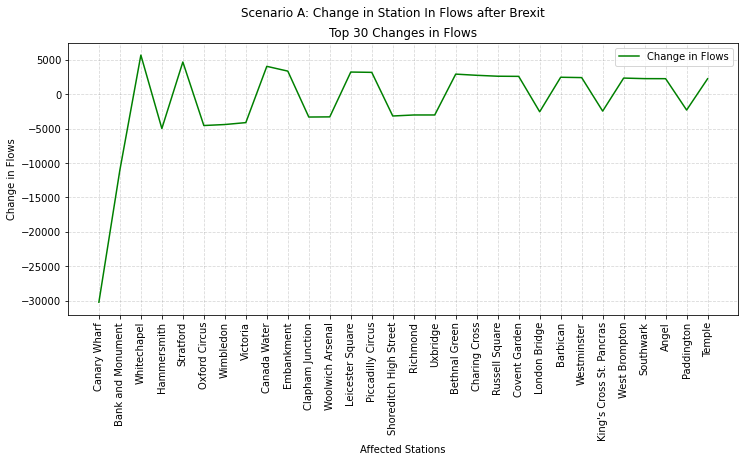

In [112]:
#plot for the SA
fig, ax = plt.subplots(1,1,figsize=(12,5))
fig.suptitle("Scenario A: Change in Station In Flows after Brexit") 
ax.plot(list(diff_sa['diff'])[0:], color = "green", label = 'Change in Flows') 
ax.grid(color='grey', linestyle='--',alpha=0.3) 
ax.set_xlabel("Affected Stations") 
ax.set_ylabel("Change in Flows")  
#ax1.set_ylim(-200,200) 
ax.set_xticks(list(range(30))) 
ax.set_xticklabels(list(diff_sa['station_destination'])[0:], rotation=90)
ax.legend(loc=1)
ax.set_title('Top 30 Changes in Flows')
plt.show()

In [113]:
# IV.2. Scenario B: A significant increase in the cost of transport
# Scenario B1
beta_1=beta*1.5
od["pro_b1"] = np.exp(od["alpha_i"]+gamma*np.log(od["jobs"]) + beta_1*od["distance"])
od["pro_b1"] = round(od["pro_b1"],0)
cdatasubmat6 = od.pivot_table(values ="pro_b1", index="station_origin", columns = "station_destination",aggfunc=np.sum, margins=True)
cdatasubmat6

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,482.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707.0
Acton Town,NaN,NaN,NaN,4.0,4.0,NaN,10.0,NaN,NaN,6.0,...,5.0,1.0,0.0,13.0,NaN,NaN,NaN,NaN,NaN,1779.0
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2137.0
Aldgate East,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,...,1.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,2298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,14.0,19.0,NaN,NaN,NaN,NaN,9.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1750.0
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.0
Woodside Park,NaN,NaN,0.0,6.0,6.0,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1084.0


In [114]:
# Scenario B2
beta_2=beta*2
od["pro_b2"] = np.exp(od["alpha_i"]+gamma*np.log(od["jobs"]) + beta_2*od["distance"])
od["pro_b2"] = round(od["pro_b2"],0)
cdatasubmat7 = od.pivot_table(values ="pro_b2", index="station_origin", columns = "station_destination",aggfunc=np.sum, margins=True)
cdatasubmat7

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,400.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,7.0,NaN,NaN,2.0,...,2.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,951.0
Aldgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,1647.0
Aldgate East,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1728.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,4.0,7.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,747.0
Woodgrange Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.0
Woodside Park,NaN,NaN,0.0,2.0,2.0,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0


In [115]:
od

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,uncon_ne,uncon_ip,pro_ip,pro_ne,alpha_i,Job_scenario_A,product,pro_b1,pro_b2
0,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,14.0,2.0,1.0,2.0,-2.491868,442,2.0,1.0,1.0
1,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,28.0,5.0,4.0,5.0,-2.491868,665,5.0,4.0,3.0
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,108.0,64.0,76.0,115.0,-2.491868,29386,70.0,80.0,55.0
3,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,98.0,53.0,56.0,66.0,-2.491868,15428,66.0,56.0,48.0
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,24.0,5.0,4.0,5.0,-2.491868,1208,5.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43940,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,29.0,25.0,132.0,107.0,0.711189,3342,107.0,41.0,16.0
43941,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,61.0,47.0,269.0,301.0,0.711189,5487,301.0,161.0,86.0
43942,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,23.0,9.0,37.0,40.0,0.711189,400,40.0,20.0,10.0
43943,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,50.0,22.0,106.0,131.0,0.711189,893,131.0,89.0,60.0


In [116]:
print(sum(od["pro_b1"])-sum(od["flows"]))
print(sum(od["pro_b2"])-sum(od["flows"]))

-643933.0
-954285.0


In [117]:
#plot for the Sb1
diff_sb1 = od.groupby('station_destination',as_index=False).agg({'flows':'sum','pro_b1':'sum'})
diff_sb1["diff"]= diff_sb1["pro_b1"] - diff_sb1["flows"]


diff_sb1["diff_abs"]= abs(diff_sb1["diff"])
diff_sb1.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sb1 = diff_sb1.head(30)
diff_sb1

,station_destination,flows,pro_b1,diff,diff_abs
15,Bank and Monument,78549,40940.0,-37609.0,37609.0
54,Canary Wharf,58772,28409.0,-30363.0,30363.0
212,Liverpool Street,61122,32817.0,-28305.0,28305.0
326,Stratford,55954,34307.0,-21647.0,21647.0
251,Oxford Circus,44368,23883.0,-20485.0,20485.0
355,Victoria,33251,16886.0,-16365.0,16365.0
197,King's Cross St. Pancras,33330,18157.0,-15173.0,15173.0
213,London Bridge,29926,16632.0,-13294.0,13294.0
147,Hammersmith,18250,6743.0,-11507.0,11507.0
119,Farringdon,25592,14207.0,-11385.0,11385.0


In [118]:
#plot for the Sb2
diff_sb2 = od.groupby('station_destination',as_index=False).agg({'flows':'sum','pro_b2':'sum'})
diff_sb2["diff"]= diff_sb2["pro_b2"] - diff_sb2["flows"]
#prodsimestsb2
diff_sb2["diff_abs"]= abs(diff_sb2["diff"])
diff_sb2.sort_values(by=["diff_abs"],ascending= False, inplace = True)
diff_sb2 = diff_sb2.head(30)
diff_sb2

,station_destination,flows,pro_b2,diff,diff_abs
15,Bank and Monument,78549,27739.0,-50810.0,50810.0
212,Liverpool Street,61122,20747.0,-40375.0,40375.0
54,Canary Wharf,58772,19190.0,-39582.0,39582.0
326,Stratford,55954,21723.0,-34231.0,34231.0
251,Oxford Circus,44368,15913.0,-28455.0,28455.0
355,Victoria,33251,10907.0,-22344.0,22344.0
197,King's Cross St. Pancras,33330,11826.0,-21504.0,21504.0
213,London Bridge,29926,11375.0,-18551.0,18551.0
119,Farringdon,25592,9306.0,-16286.0,16286.0
138,Green Park,26754,10807.0,-15947.0,15947.0


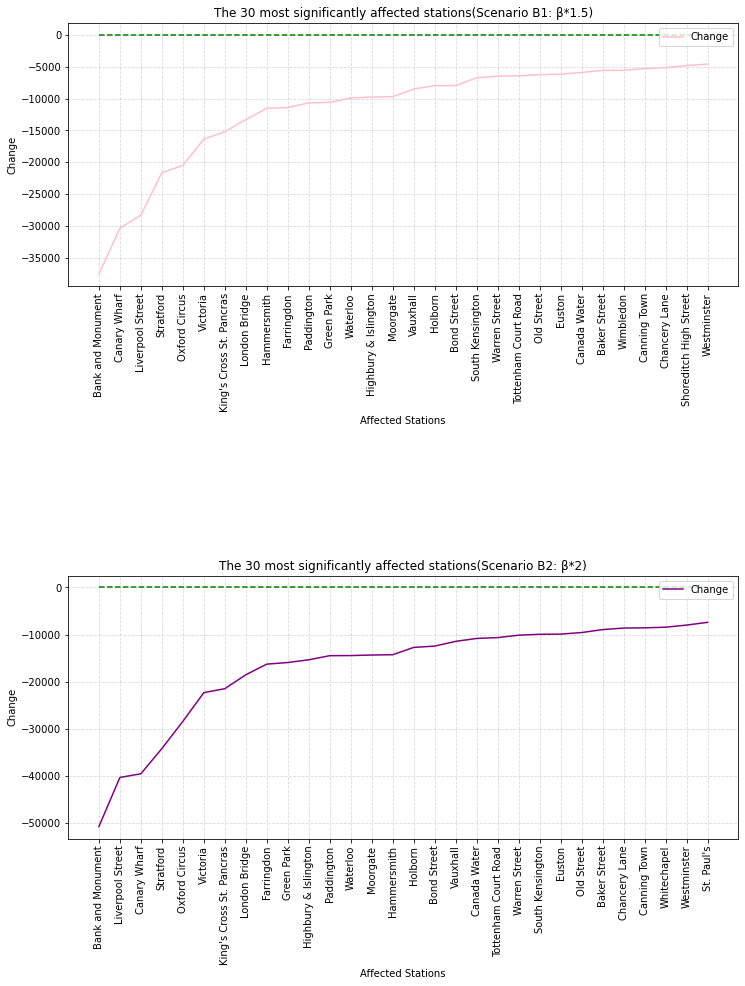

In [119]:
#plot for the Sb1
fig, ax = plt.subplots(2,1,figsize=(12,15))

ax[0].plot(list(diff_sb1['diff']), color = "pink", label = 'Change') 
ax[0].plot([0]*30, color = "green", linestyle='--',linewidth=1.5 ) 
ax[0].grid(color='grey', linestyle='--',alpha=0.3) 
ax[0].set_xlabel("Affected Stations") 
ax[0].set_ylabel("Change")  
ax[0].set_xticks(list(range(30))) 
ax[0].set_xticklabels(list(diff_sb1['station_destination']), rotation=90) #[1:]
ax[0].legend(loc=1)
ax[0].set_title('The 30 most significantly affected stations(Scenario B1: β*1.5)')


#plot for the Sb2

ax[1].plot(list(diff_sb2['diff']), color = "purple", label = 'Change') 
ax[1].plot([0]*30, color = "green", linestyle='--',linewidth=1.5 ) 
ax[1].grid(color='grey', linestyle='--',alpha=0.3) 
ax[1].set_xlabel("Affected Stations") 
ax[1].set_ylabel("Change")  
ax[1].set_xticks(list(range(30))) 
ax[1].set_xticklabels(list(diff_sb2['station_destination']), rotation=90) #[1:]
ax[1].legend(loc=1)
ax[1].set_title('The 30 most significantly affected stations(Scenario B2: β*2)')
fig.subplots_adjust(wspace=0,hspace=1.1)
plt.show()